In [1]:
import random as rnd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def Ruina(A,B, ap = 1): 
    cont = 1
    lines =[]
    Total= A+B
    num =  A 
    while (num > 0 and num < Total):
        num = num + rnd.choice([-ap,ap])
        lines.append([cont,num])
        cont= cont + 1
    return lines  

In [12]:
Ruina(5,5,ap = 1)

[[1, 6],
 [2, 5],
 [3, 4],
 [4, 5],
 [5, 6],
 [6, 7],
 [7, 8],
 [8, 7],
 [9, 8],
 [10, 7],
 [11, 6],
 [12, 5],
 [13, 4],
 [14, 5],
 [15, 6],
 [16, 5],
 [17, 4],
 [18, 5],
 [19, 6],
 [20, 7],
 [21, 8],
 [22, 9],
 [23, 8],
 [24, 7],
 [25, 8],
 [26, 7],
 [27, 6],
 [28, 5],
 [29, 4],
 [30, 5],
 [31, 6],
 [32, 5],
 [33, 6],
 [34, 5],
 [35, 6],
 [36, 7],
 [37, 8],
 [38, 7],
 [39, 8],
 [40, 7],
 [41, 6],
 [42, 5],
 [43, 6],
 [44, 5],
 [45, 4],
 [46, 5],
 [47, 6],
 [48, 5],
 [49, 4],
 [50, 5],
 [51, 6],
 [52, 5],
 [53, 6],
 [54, 7],
 [55, 6],
 [56, 7],
 [57, 8],
 [58, 7],
 [59, 8],
 [60, 7],
 [61, 8],
 [62, 7],
 [63, 8],
 [64, 9],
 [65, 10]]

In [38]:
Simul = 10000
A=10
B=10
p=0.5
def Ruin(A,B,p,Simul):
    a=np.zeros(Simul)
    for i in range(Simul):
        Objetivo = B+A
        num = A
        cont=1
        while (num > 0 and num < Objetivo):
            if (np.random.uniform(0,1) <= p):
                num = num + 1
            else: num += -1;
            cont= cont + 1
        if cont> 19:
            a[i]=1
    prob_19 = sum(a)/Simul
    return  prob_19


<BarContainer object of 5 artists>

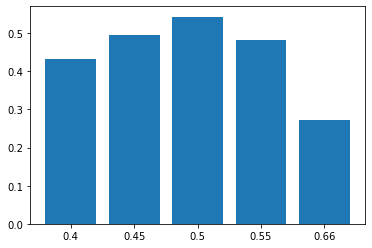

In [41]:
names = ['0.4','0.45','0.5','0.55','0.66']
valor=[Ruin(5,5,0.4,1000),Ruin(5,5,0.45,1000),Ruin(5,5,0.5,1000),Ruin(5,5,0.55,1000),Ruin(5,5,0.66,1000)]
plt.bar(names,valor)

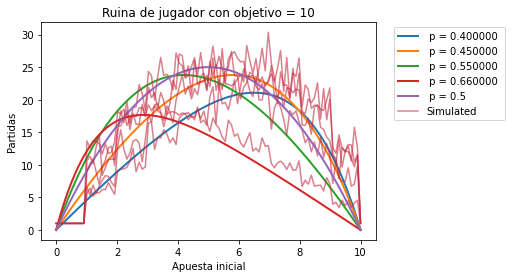

In [3]:
E = lambda k,p,N: (N/(2*p - 1))*((1 - ((1-p)/p)**k)/(1 - ((1-p)/p)**N)) - k/(2*p - 1);
# Evaluating E for p < 1/2 runs into numerical problems with the large fractions. Let us regroup:
E1 = lambda k,p,N: (N/(2*p - 1))*(((1 - ((1-p)/p)**k)*((1-p)/p)**(-N))/(((1-p)/p)**(-N) - 1)) - k/(2*p - 1);
Ehalf = lambda k,N: N*k - k**2;

def SimulateGame1_3(k,p,N):
    NGames = 100; # number of games we simulate, and then average over.
    ret = [];
    for ktmp in k:   
        ktmp = int(ktmp);
        playresults = []; # temp array of results that we finally average over
        for i1 in range(NGames):
            Nplays = 1; # number of games we have managed to play for this k
            ktmp1 = ktmp;
            while (True): 
                if (ktmp1 == 0) or (ktmp1 == N): break;
                if (np.random.uniform(0,1) <= p): ktmp1 += 1;
                else: ktmp1 += -1;
                Nplays += 1;
            playresults.append(Nplays);
        ret.append(np.mean(playresults)); # Expected number of games for this k
    return ret;


N = 10;        
krange=np.linspace(0, N, num=100);
p1list = [0.4,0.45,0.55,0.66];


for p in p1list:
    plt.plot(krange, E1(krange,p,N), linewidth=2, label=" p = %f "%(p)); 
    plt.plot(krange, SimulateGame1_3(krange,p,N),color='#c42d41', alpha=0.6);
    
plt.plot(krange, Ehalf(krange,N), linewidth=2, label=" p = 0.5 ");
plt.plot(krange, SimulateGame1_3(krange,0.5,N),color='#c42d41', alpha=0.6, label = 'Simulated');
    

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left");
plt.title('Ruina de jugador con objetivo = %d'%(N));
plt.xlabel('Apuesta inicial');plt.ylabel('Partidas');
plt.show();